# Projekt 1 – perceptron Rosenblatta

## Temat: płytka sieć do nauki problemu XOR

### To do:
* Krótki opis problemu - eze
* Opis zaimplementowanych funkcji - eze
* Opis zaimplementowanych zmiennych i stałych - eze
* Wykresy błędu MSE (błędu średniokwadratowego) w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym) - nie jestem pewien o co chodzi z "w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym)"
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1) - okej troche mi się nie chce
* wykresy wag w obu warstwach. - okej troche mi się nie chce

### To do - jak wystarczy czasu - pewnie nie wystarczy:
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości,
* dodanie momentum,
* adaptacyjny współczynnik uczenia,
* dodanie mini-batch.

### Opis Problemu - MLP for XOR problem
Do wykonania jest wielowarstwowa sieć neuronowa rozwiazująca problem XOR. Jest to problem posiadający dwa wejścia $x_{1} $x_{2}

In [38]:
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt

In [39]:
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [40]:
np.random.seed(0)

In [41]:
# generate data
def data_generator(random = False, multiply_by = 1, shuffle = True):
    if random:
        X = np.random.binomial(1, 0.5, (4*multiply_by, 2))
        Y = np.array([[X[i][0] ^ X[i][1]] for i in range(0,X.shape[0])])
    else:
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([[0],[1],[1],[0]])
        X = np.tile(X, (multiply_by, 1))
        Y = np.tile(Y, (multiply_by, 1))
        
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]
    return X, Y

def shuffle(X,Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]
    return X,Y


In [48]:
# activation function
def sigmoid(x): 
	return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x): 
    return x * (1 - x)

In [49]:
# weights and biases initialization
def initialize_params():
    # output layer weights and biases
    W1 = np.random.rand(inputLayerNeurons, hiddenLayerNeurons) - 0.5
    b1 = np.random.rand(1, hiddenLayerNeurons) - 0.5
    # hidden layer weights and biases
    W2 = np.random.rand(hiddenLayerNeurons, outputLayerNeurons) - 0.5
    b2 = np.random.rand(1, outputLayerNeurons) - 0.5
    return W1, b1, W2, b2

In [50]:
def forward_prop(W1, b1, W2, b2, X):
    # 1. layer
    Z1 = np.dot(X,W1) + b1
    A1 = sigmoid(Z1)
    
    # 2. layer
    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): 
    # 2. layer
    Err = 1/2*(Y - A2) **2 # Zliczanie samego błędu MSE
    dA2 = ( Y - A2)  # Pochodna of Error
    dZ2 = dA2 * sigmoid_prime(A2)
    
    # 1. layer
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_prime(A1) 
    
    return dZ1, dZ2, dA2, Err

def update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr):
    # 1. layer
    #print(X)
    #print(dZ1)
    #print(X.T.dot(dZ1))
    W1 = W1 + lr * X.T.dot(dZ1)
    b1 = b1 + lr * np.sum(dZ1,axis=0,keepdims=True) * lr   
    
    # 2. layer 
    W2 = W2 + lr * A1.T.dot(dZ2)  
    b2 = b2 + lr * np.sum(dZ2,axis=0,keepdims=True) * lr    
    
    return W1, b1, W2, b2


In [60]:
# def get_predictions(A2):
### TO DO

# def get_accuracy(predictions, Y):
### TO DO

def gradient_descent(X_b, Y_b, lr, iterations, logs = True):
    W1, b1, W2, b2 = initialize_params()
    Error = []
    for i in range(iterations):
        for j in range(0,3,1):
            X = np.array([X_b[j]])
            Y = np.array([Y_b[j]])
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            #print(X)
            #print(Y)
            #print(X_b)
            #print(Y_b)
            dZ1, dZ2, dA2, Err = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr)
            print(Err[0][0])
            Error.append(Err[0][0])
            #print(Err)
        X, Y = shuffle(X,Y)
        if i % 100 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
    print("Final Predictions")
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, Error


In [65]:
X, Y = data_generator(random = False, multiply_by = 1, shuffle = True)
#XMSE, YMSE = X,Y
#W1_MSE, b1_MSE, W2_MSE, b2_MSE, Error_MSE = gradient_descent_MSE(XMSE, YMSE, 0.2, 5000, logs = False) 
W1, b1, W2, b2, Error = gradient_descent(X, Y, 0.5, 1000, logs = False)
#print(Error)
#print(Error_MSE)

0.06203930210266333
0.05831182234967915
0.21931888332771157
0.06152938732414087
0.0578388618249447
0.2199484824414845
0.0610601485849912
0.057403331689339754
0.2205117593116797
0.06062772887946606
0.05700169053728561
0.22101422556091102
0.06022867636421167
0.05663076887728869
0.22146088394788646
0.05985989551350678
0.056287724306598945
0.2218562786345981
0.05951860502236146
0.055970002886659216
0.2222045399481764
0.059202301414536064
0.05567530575743277
0.22250942429226903
0.05890872748763903
0.05540156019127041
0.2227743497832511
0.05863584487136726
0.055146894420275004
0.22300242811563478
0.05838181009344802
0.054909615680674276
0.22319649309827566
0.058144953645622714
0.05468819100795428
0.2233591262477721
0.05792376162287962
0.05448123039103764
0.2234926797771072
0.057716859576175276
0.05428747195549275
0.2235992972753683
0.05752299827458571
0.05410576889697636
0.2236809323375936
0.05734104111921729
0.05393507792873277
0.22373936537178182
0.057169952989946496
0.05377444904253042
0.

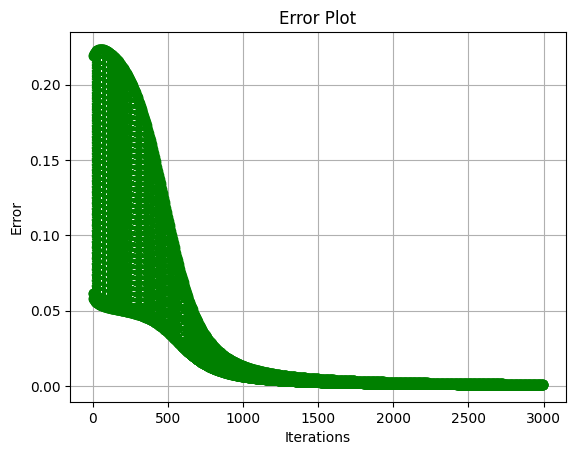

In [66]:
# Plotting the errors
plt.plot(Error, 'o:g')
#plt.plot(Error_MSE, 'o:r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error Plot')
plt.grid(True)
plt.show()